# PART IV

- Business case formulated : Lift calculated based on the probability score of each person in test set

Business Understanding

- A term deposit is a deposit held at a financial institution that has a fixed term. These are generally short term with maturities ranging anywhere from a month to a few years. When a term deposit is purchased, the lender (the customer) understands that the money can only be withdrawn after a term has ended or by giving a predetermined number of days’ notice.
- Term deposits are an extremely safe investment and are therefore very appealing to conservative, low risk investors.
- Instead of mass marketing, the bank has chosen to be more proactive in identifying potential buyers and communicate straight to the customers via telephone calls.
- Direct marketing is useful here because its positive results can be measured directly.

  - The data for this exercise consists of about 41188 data points split in a 80/20 ratio among training and test files.
  - In the experiment simulated by the data, a promotional campaign was tested to see if it would bring more clients to subscribe to a bank term deposit of €250 (minimum ammount in most portuguese banks, will be used as reference). It costs the company on average € 3,54  to directly call a client and try to pitch the promotional campaign.
  - In order to maximize incremental revenue, it would be best to limit the promotional only to those that would be most receptive to it. 
  
         -Each data point includes one column indicating whether or not a client received a promotion for the product (´Promotion'), and one column indicating whether or not that client eventually subscribed to a term deposit ('y').
        - Each client also has 11 additional features associated to them, which may impact on how the predictive models behave
        after they are trained with the treatment and outcome information ( treatment= 'Promotion', outcome= 'y').
  

Optimization Strategy


- Use the training data to understand the patterns in the 11 associated client features to indicate if a Promotion would be communicated to and received by a client.

- The goal is to maximize the following metrics:

  - Incremental Response Rate (IRR)
  
- IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. It would be represented as the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (treatment) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (control).

  - IRR = n_treat_purch / n_treat - n_ctrl_purch / n_control
  
  - Net Incremental Revenue (NIR)
  
- NIR depicts how much is made (or lost) by sending out the promotion.It would be represented as 250 times the total number of purchasers that received the promotion minus 3.54 times the number of promotions sent out, minus 250 times the number of purchasers who were not given the promotion.

   - NIR = 250 * n_treat_purch - 3.54 * n_treat - 250 * n_ctrl_purch
   
How to test the Strategy?

After building an optimization strategy which alligns the business objective and the statistical rules of the model, complete the promotion_strategy function to pass to the test_results function.
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers: ### Insert table / kane.et.al or siegel ####


The metrics are only being compared for the individuals predicted that should obtain the promotion – that is, quadrants I and II. Since the first set of individuals that receive the promotion (in the training set) receive it randomly, it can be expected that quadrants I and II will have approximately equivalent participants.

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future.

Get started by reading in the data below. See how each variable or combination of variables along with a promotion influences the chance of subscribtion.

In [1]:
# load in packages
from itertools import combinations

import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

either change promotion to yes no
or promos to response

In [2]:

def score(df, promo_pred_col = 'Promotion'):
    n_treat       = df.loc[df[promo_pred_col] == 'Received',:].shape[0]
    n_control     = df.loc[df[promo_pred_col] == 'Not Received',:].shape[0]
    n_treat_purch = df.loc[df[promo_pred_col] == 'Received', 'y'].sum()
    n_ctrl_purch  = df.loc[df[promo_pred_col] == 'Not Received', 'y'].sum()
    irr = n_treat_purch / n_treat - n_ctrl_purch / n_control
    nir = 250 * n_treat_purch - 3.54 * n_treat - 250 * n_ctrl_purch
    return (irr, nir)

def test_results(promotion_strategy):
    test_data = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\testwlabel.csv',delimiter =',') # test data = testwlabel
    df = test_data[['age','job','marital','education','housing','contact','month','day_of_week','duration','previous','poutcome']]
    promos = promotion_strategy(df)
    score_df = test_data.iloc[np.where(promos == 'yes')]    
    irr, nir = score(score_df)
    
    #print('Your irr with this strategy is {:0.4f}.'.format(irr))
    #print()
   # print('Your nir with this strategy is {:0.2f}.'.format(nir))
    return irr, nir

# added this function to test our irr and nlr on the validation set
def valid_results(promotion_strategy, valid_data):
    df = valid_data[['age','job','marital','education','housing','contact','month','day_of_week','duration','previous','poutcome']]
    promos = promotion_strategy(df)
    score_df = valid_data.iloc[np.where(promos == 'yes')]    
    irr, nir = score(score_df)
    #print()
   # print('Your irr with this strategy is {:0.4f}.'.format(irr))
    #print()
    #print('Your nir with this strategy is {:0.2f}.'.format(nir))
    return irr, nir

In [3]:
# Load df_data
df_data = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\df_data.csv',delimiter =',')

In [4]:
# Load in test_data, check if everuthing checks out, compare with df_data
test_data = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\testwlabel.csv',delimiter =',')


In [5]:
# Drop Unnamed: 0 from bots sets, it tries to identify client number. The sets already have nr as enrty.
df_data = df_data.drop(['Unnamed: 0'],axis=1)
test_data = test_data.drop(['Unnamed: 0'],axis=1)

In [6]:
# Check df data ( training set)
df_data.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,previous,poutcome,y,Promotion
0,3,3,1,0,0,1,6,1,3,0,1,0,Received
1,3,7,1,3,0,1,6,1,2,0,1,0,Not Received
2,2,7,1,3,2,1,6,1,3,0,1,0,Received
3,2,0,1,1,0,1,6,1,2,0,1,0,Not Received
4,3,7,1,3,0,1,6,1,3,0,1,0,Received


In [7]:
# Check test_data (test-set)
test_data.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,previous,poutcome,y,Promotion
0,3,7,1,1,2,0,7,4,5,0,1,0,Received
1,3,9,1,5,2,0,3,2,1,0,1,0,Not Received
2,1,1,2,0,0,0,7,2,2,0,1,0,Not Received
3,1,7,1,5,0,1,6,1,3,0,1,0,Received
4,1,1,2,3,2,0,6,2,3,0,1,0,Received


In [8]:
# Assign features in a dataframe separately form 'Promotion' and 'y'

features =['age','job','marital','education','housing','contact','month','day_of_week','duration','previous','poutcome']

# Exploratory analysis

In [9]:
# Value count check 1
df_data['Promotion'].value_counts()

Not Received    20705
Received        20483
Name: Promotion, dtype: int64

If we treat the act of giving promotion as a treatment given by the company to its customers and those that were not given promotion as the control group, it can be seen that there is nearly an equal number of customers that belong to both the groups.

In [10]:
# Value count check 2
df_data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

It is clear from this numbers that there is a high imbalance in the number of customers who chose to purchase the product vs those who didn't. It may be necessary to use oversampling techniques from under-represented (minority) value 1 for target variable subscribed. SMOTE is one useful technique that generates balanced dataset for training purpose while also introducing some variations in the input variables while oversampling the data with minority target value.

SMOTE (Synthetic Minority Oversampling Technique),allows us to create new observations with slightly different feature values from the original observations. This is often a better approach than just resampling the original data, which will create too many duplicated data points and lead to over-fitting in the machine learning model.
source: https://medium.com/datadriveninvestor/simple-machine-learning-techniques-to-improve-your-marketing-strategy-demystifying-uplift-models-dc4fb3f927a2

# Promotion and y dispersion in df features - Training set

In [11]:
# df_data[(df_data['Promotion']=='Received') & (df_data['y']== 1 )][df].hist(figsize=(12,12)); # Equivalent to Group TR

In [12]:
#df_data[(df_data['Promotion']=='Received') & (df_data['y']== 0 )][df].hist(figsize=(12,12)); # Equivalent to Group TN

In [13]:
#df_data[(df_data['Promotion']=='Not Received') & (df_data['y']== 1 )][df].hist(figsize=(12,12)); # Equivalent to Group CR

In [14]:
#df_data[(df_data['Promotion']=='Not Received') & (df_data['y']== 0 )][df].hist(figsize=(12,12)); # Equivalent to Group CN

# Promotion and y dispersion in df features - Test set

In [15]:
#test_data[(test_data['Promotion']=='Received') & (test_data['y']== 1 )][df].hist(figsize=(12,12)); # Equivalent to Group TR

In [16]:
#test_data[(test_data['Promotion']=='Received') & (test_data['y']== 0 )][df].hist(figsize=(12,12)); # Equivalent to Group TN

In [17]:
#test_data[(test_data['Promotion']=='Not Received') & (test_data['y']== 1 )][df].hist(figsize=(12,12)); # Equivalent to Group CR

In [18]:
#test_data[(test_data['Promotion']=='Not Received') & (test_data['y']== 0 )][df].hist(figsize=(12,12)); # Equivalent to Group CN

# Base Model - where we send promotions to everyone ( Traditional Response  example)

In [19]:
def promotion_strategy(df):
    
    test = df
    
    send = []
    
    num_test_points = test.shape[0]
    
    for i in range(num_test_points):
        send.append('yes')
        
    send = np.array(send)
    
    return send

In [20]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

(0.17804621353436778, 169143.96)

- For the baseline model, we should only consider the NIR. Since response is measured directly from a previous control group of a similar campaign, opposed to IRR which is a predicted outcome.

# Useful Information

- Clients divided into the 2 Groups: Treatment & Control
  - Control      20705
  - Treatment    20483

- Customers divided into the 4 subroups of Treatment & Control
  - CN    20141
  - TN    16407
  - TR     4076
  - CR      564

# Incremental Response Rate (IRR)- For Baseline use response rate function


- IRR measures how many more customers purchased the product with the promotion, as compared to if they didn’t receive the promotion.


In [21]:
# Standard Response Rate for this campaign if No Groups are used / Traditional response model

4640/41188

0.11265417111780131

If a traditional response model is used, the response rate will have a likelyhood of 11,26%

# Net Incremental Revenue (NIR)


- NIR measures how much is made (or lost) by sending out the promotion.
- Mathematically, this is 250 times the total number of purchasers that received the promotion minus 3.54 times the number of promotions sent out, minus 250 times the number of purchasers who did not receive the promotion.

# More Information

- Total number of purchasers = 4076 + 564 = 4640
- Total number of non purchasers = 41188 - 4640 = 36548
- Average cost per call = 258 * 1.2 = 309,6 cents or 3.1 €

- Campaign Costs:
- West Europe call centres average at 45€ per hour
If the rate per h = 45 € , and if there are a total of 3242 hours and 10 min duration, then the bill for call duration would be € 145,897.5.

Marketing Investment for the current campaign (communication only) = € 145,897,5
- Average cost per call = 145,897,5/41188 = € 3,54

- There is no information regarding the actual campaign cost. This is merely an assumption based on the case study limited information and call center costs per hour in western europe.
https://www.worldwidecallcenters.com/pt/call-center-pricing/

>>> Will consider to change values for a more demonstrative approach

- The base model will serve as a benchmark to compare against 3 uplift models, where the clients who have the highest probability/propensity of subscribing to a term deposit will be selected, and send them promotions.

- The baseline model has a response rate of 11,26 %
- The baseline model has a NIR of € 170959.40

 >>> I can use the actual revenue.
 >>>> Can use NIR to show how much more or less revenue the model would generate as compared to the actual revenue.
 >>>>> Or I can compare the baseline NIR... which doesnt make sense since Traditional Response Models do not use groups, therefore I should not generate the NIR.
 >>>> need advice

# Model 1: Traditional Approach

In this approach, labels of 1 are assignes to customers who received the promotion and subscribed for a term deposit, and labels of 0 to everyone else. This way, the model has to find the customers who are likely to subscribe only after they received a promotion.

The traditional approach to uplift modeling is training a predictive model on only the treatment group. This model will separate those who are likely to respond from those who are less likely to respond.

We will train the model on the entire dataset, but keep the original task of identifying customers who will make a purchase only after they were given a promotion.
We can do this by assigning labels of 1 to individuals that received a promotion and made a purchase, and labels of 0 to everyone else.

The model will be trained on the entire dataset.
Response labels will be created:
- Only those who received a promotion and subscribed receive a response label of 1.
- All the others will receive a response label of 0.


In [22]:
# generate labels
# only those who subscribed after receiving a promotion will be assigned a label of 1, 
# while the other clients will be given a label of 0

response = []

for index, row in df_data.iterrows():
    if (row['y'] == 1) and (row['Promotion']=='Received'):
        response.append(1.0)
    else:
        response.append(0.0)
        
df_data['response'] = response

In [23]:
df_data.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,previous,poutcome,y,Promotion,response
0,3,3,1,0,0,1,6,1,3,0,1,0,Received,0.0
1,3,7,1,3,0,1,6,1,2,0,1,0,Not Received,0.0
2,2,7,1,3,2,1,6,1,3,0,1,0,Received,0.0
3,2,0,1,1,0,1,6,1,2,0,1,0,Not Received,0.0
4,3,7,1,3,0,1,6,1,3,0,1,0,Received,0.0



•	 	Compare predictive model performance against
 random results with lift charts and decile tables.
 
- Using lift charts, hold out samples, and decile
 tables are a basic way to look at predictive
 model performance. Typically models are
 validated against a hold out group. This
 group contains data that has not been
 included in the development of the model.
 
 source: A Simple Framework for Building Predictive Models, Hal Kalechofsky, Ph.D.
 
 - As stated above, a split has to be performed and create a training and validation set.
 - Split ratio 80/20 


In [24]:
# split data into train and valid
train, valid = sk.model_selection.train_test_split(df_data, test_size=0.2,random_state=42)

In [25]:
# generate features and labels
Y_train = train['response']
X_train = train[features]

Y_valid = valid['response']
X_valid = valid[features]

In [26]:
Y_train.value_counts()

0.0    29704
1.0     3246
Name: response, dtype: int64

- As there are very few positive responses,in order to adjust training accuracy, we will up-sample the training data, but not the validation and test dataset. This will help balance the number of data points for each class.

In [27]:

# up sample only the train dataset with SMOTE
sm = SMOTE(random_state=42, sampling_strategy=0.5)
X_train_upsamp, Y_train_upsamp = sm.fit_sample(X_train, Y_train)
    
X_train_upsamp = pd.DataFrame(X_train_upsamp, columns=features)

Y_train_upsamp = pd.Series(Y_train_upsamp)

- Now, we are ready to feed the data into a machine learning model. The model used for this example is the XGBoost Classifier, a relatively popular model often used in machine learning competitions. Of course, you should try other machine learning models as well to see which is the most suitable.
 features in df

In [28]:
# Train an xgboost model
eval_set = [(X_train_upsamp, Y_train_upsamp),(X_valid, Y_valid)]
model = xgb.XGBClassifier(learning_rate = 0.1,\
                          max_depth = 7,\
                          min_child_weight = 5,\
                          objective = 'binary:logistic',\
                          seed = 42,\
                          gamma = 0.1,\
                          silent = True)
model.fit(X_train_upsamp, Y_train_upsamp, eval_set=eval_set,\
          eval_metric="auc", verbose=True, early_stopping_rounds=30)

[15:08:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.92643	validation_1-auc:0.92127
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.92678	validation_1-auc:0.92235
[2]	validation_0-auc:0.92853	validation_1-auc:0.92312
[3]	validation_0-auc:0.92937	validation_1-auc:0.92355
[4]	validation_0-auc:0.92970	validation_1-auc:0.92395
[5]	validation_0-auc:0.93003	validation_1-auc:0.92394
[6]	validation_0-auc:0.92955	validation_1-auc:0.92359
[7]	validation_0-auc:0.93186	validation_1-auc:0.92421
[8]	validation_0-auc:0.9325

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

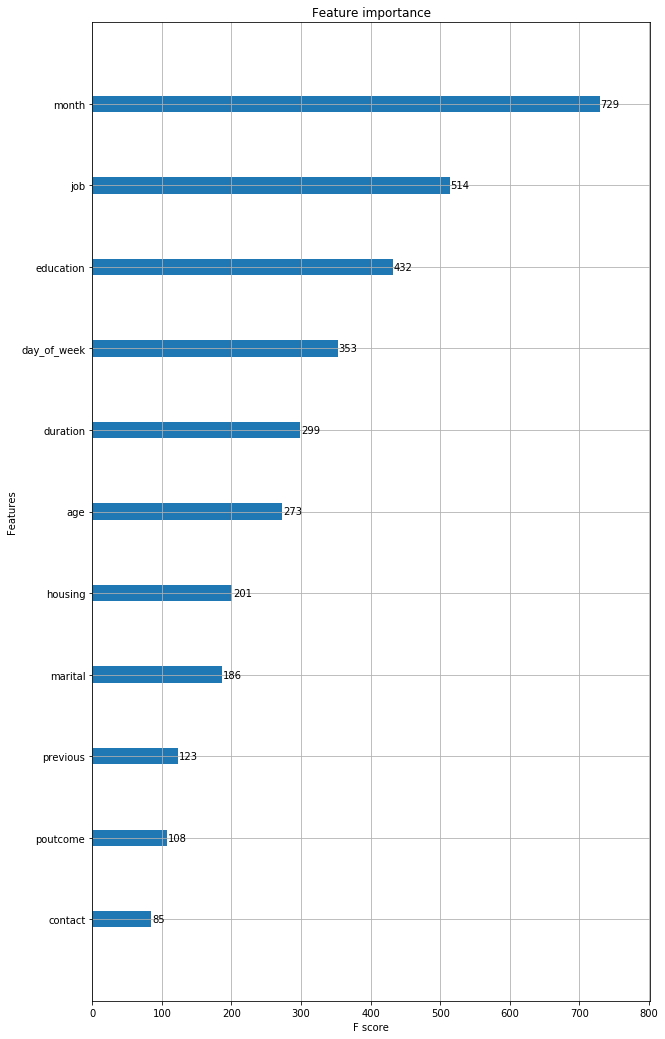

In [29]:
# Which features have greater importance 

from xgboost import plot_importance
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10, 18));
xgb.plot_importance(model, ax=ax);

In [30]:
# confusion matrix
valid_pred = model.predict(X_valid, ntree_limit=model.best_ntree_limit)
cm = sk.metrics.confusion_matrix
cm(Y_valid, valid_pred)

array([[6485,  923],
       [ 158,  672]], dtype=int64)

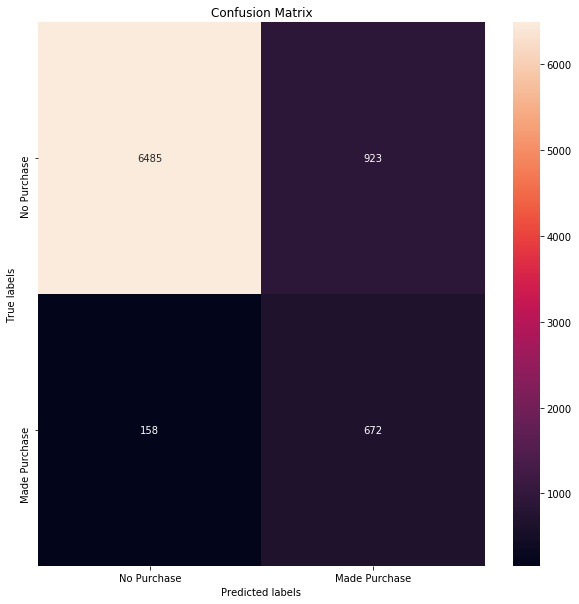

In [31]:
# confusion marix for thge validation set
valid_pred = model.predict(X_valid, ntree_limit=model.best_ntree_limit)
cm = sk.metrics.confusion_matrix(Y_valid, valid_pred)

fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Purchase', 'Made Purchase']); 
ax.yaxis.set_ticklabels(['No Purchase', 'Made Purchase']);

- So how do we predict whether a new individual should receive the promotion?
- If the model predicts a label of 1 for that individual, then it is likely that the individual will respond favorably to the promotion campaign and we should send him or her the promotion.
- Otherwise, we should not send a promotion.

In [32]:
def promotion_strategy(df):
 
    test = df
    
    preds = model.predict(test, ntree_limit=model.best_ntree_limit)

    send = []
    for pred in preds:
        if pred == 1:
            send.append('yes')
        else:
            send.append('no')
    send = np.array(send)
    return send

In [33]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

C:\Users\rol3x\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  


(nan, 171311.22)

Test set:

    IRR = 2,8%
    NIR = € -107.85

In [34]:

# test irr and nir on our validation set
valid_results(promotion_strategy, valid)

C:\Users\rol3x\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  


(nan, 162353.7)

Validation Set:
    
    IRR = 3,7%
    NIR = € 151.10

Result:
    
  - Since the IRR and NIR on the validation set had better results than the test set at 3,7% and € 151.10 ,the model's relatively worse performance on the test set may be due to random chance.
  - In any case, these results are far better than in the base model approach, where the promotions were sent to the entire client base.

# Model 2: Two Models Approach

- In this approach, we will train two models. One model will be trained on the treatment group (those who received the promotion) and we will refer to this model as the treatment model. Another model will be trained on the control group (those who did not received the promotion), and we will refer to this as the control model. The target of both models will be whether the individual made the purchase or not. 

- The treatment model will predict the probability that individual will make a purchase if he or she received the promotion, while the control model will predict the probability that individual will make a purchase if he or she did not receive the promotion. Ideally the difference in the probabilities, which we will call the lift:

        - Lift = P(purchase / Treatment) - P(purchase / Control)
        
will tell us the probability that sending a promotion to an individual will increase his or her willingness to make a purhcase vs not sending a promotion. We can then send promotions to individuals with lift values higher than a pre-defined cutoff percentile. For example, we can send promotions to individuals in the top 3 deciles.



- The two model approach is commonly described in uplift modeling literature. It is a simple and intuitive approach. Two separate models are trained: a control model and a treatment model.
- The control model, which is trained only on the control data (individuals who did not receive the promotion), will predict how likely an individual will make a purchase without the influence of the treatment (receive no promotion).
- The treatment model, which is trained only on the treatment data (individuals who received the promotion), will predict how likely an individual will make a purchase under the influence of the treatment (receive promotion).
- Ideally, the difference in the predicted probabilities of the two models will indicate whether sending a promotion will increase an individual’s likelihood of making a purchase. We will refer to this difference in probabilities as the lift, a term commonly found in uplift modeling literature.

- We can then select a cut-off percentile of the lift values, either through a grid search or manual selection, to identify which individuals we should send the promotions. For example, we can choose to send the promotions only to individuals with lift values in the top 5 percentiles.

The code for this model is relatively similar to the first model, except that we will be training two models on different datasets: one for the control group and the other for the treatment group. Remember to up-sample both the treatment and control training data separately as both groups are likely to have different characteristics.

In [35]:
# Load df_data
df_data = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\df_data.csv',delimiter =',')

# Load in test_data, check if everuthing checks out, compare with df_data
test_data = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\testwlabel.csv',delimiter =',')


In [36]:
# split data into train and valid
train, valid = sk.model_selection.train_test_split(df_data, test_size=0.2,random_state=42)

In [37]:
# Assign features in a dataframe separately form 'Promotion' and 'y'

features =['age','job','marital','education','housing','contact','month','day_of_week','duration','previous','poutcome']

# Generate validation data
# one for control group, another for treatment group
valid_control = valid[valid['Promotion']=='Not Received']
Y_valid_control = valid_control['y']
X_valid_control = valid_control[features]

valid_exper = valid[valid['Promotion']=='Received']
Y_valid_exper = valid_exper['y']
X_valid_exper = valid_exper[features]

In [38]:
# generate training data
train_control = train[train['Promotion']=='Not Received']
Y_train_control = train_control['y']
X_train_control = train_control[features]

train_exper = train[train['Promotion']=='Received']
Y_train_exper = train_exper['y']
X_train_exper = train_exper[features]

In [40]:
# up-sample training data with SMOTE
sm = SMOTE(random_state=42, sampling_strategy=0.5)

# up-sample control group
X_train_control_upsamp, Y_train_control_upsamp = sm.fit_sample(X_train_control, Y_train_control)
X_train_control_upsamp = pd.DataFrame(X_train_control_upsamp, columns=features)
Y_train_control_upsamp = pd.Series(Y_train_control_upsamp)

# up-sample treatment group
X_train_exper_upsamp, Y_train_exper_upsamp = sm.fit_sample(X_train_exper, Y_train_exper)    
X_train_exper_upsamp = pd.DataFrame(X_train_exper_upsamp, columns=features)
Y_train_exper_upsamp = pd.Series(Y_train_exper_upsamp)

In [41]:
# train control model
eval_set = [(X_train_control_upsamp, Y_train_control_upsamp), (X_valid_control, Y_valid_control)]
model_control = xgb.XGBClassifier(learning_rate = 0.1,\
                                  max_depth = 7,\
                                  min_child_weight = 5,\
                                  objective = 'binary:logistic',\
                                  seed = 42,\
                                  gamma = 1,\
                                  #colsample_bytree = 0.1,\
                                  silent = True)
model_control.fit(X_train_control_upsamp, Y_train_control_upsamp, eval_set=eval_set,\
                    eval_metric="auc", verbose=True, early_stopping_rounds=30)

[15:08:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.93664	validation_1-auc:0.87801
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.93808	validation_1-auc:0.87722
[2]	validation_0-auc:0.94057	validation_1-auc:0.88566
[3]	validation_0-auc:0.94158	validation_1-auc:0.88585
[4]	validation_0-auc:0.94401	validation_1-auc:0.88761
[5]	validation_0-auc:0.94632	validation_1-auc:0.88701
[6]	validation_0-auc:0.94654	validation_1-auc:0.88786
[7]	validation_0-auc:0.94893	validation_1-auc:0.88775
[8]	validation_0-auc:0.9494

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [42]:
# train treatment model
eval_set = [(X_train_exper_upsamp, Y_train_exper_upsamp), (X_valid_exper, Y_valid_exper)]
model_exper = xgb.XGBClassifier(learning_rate = 0.1,\
                                max_depth = 7,\
                                min_child_weight = 5,\
                                objective = 'binary:logistic',\
                                seed = 42,\
                                gamma = 1,\
                                #colsample_bytree = 0.1,\
                                silent = True)
model_exper.fit(X_train_exper_upsamp, Y_train_exper_upsamp, eval_set=eval_set,\
                eval_metric="auc", verbose=True, early_stopping_rounds=30)

[15:08:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82919	validation_1-auc:0.82441
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.83373	validation_1-auc:0.82371
[2]	validation_0-auc:0.83499	validation_1-auc:0.82505
[3]	validation_0-auc:0.84502	validation_1-auc:0.83421
[4]	validation_0-auc:0.85024	validation_1-auc:0.83892
[5]	validation_0-auc:0.85055	validation_1-auc:0.83763
[6]	validation_0-auc:0.85140	validation_1-auc:0.83919
[7]	validation_0-auc:0.85294	validation_1-auc:0.84151
[8]	validation_0-auc:0.8541

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [43]:
# make predictions on the validation data sets for both models
control_valid_pred = model_control.predict(X_valid_control, ntree_limit=model_control.best_ntree_limit)
exper_valid_pred = model_exper.predict(X_valid_exper, ntree_limit=model_exper.best_ntree_limit)

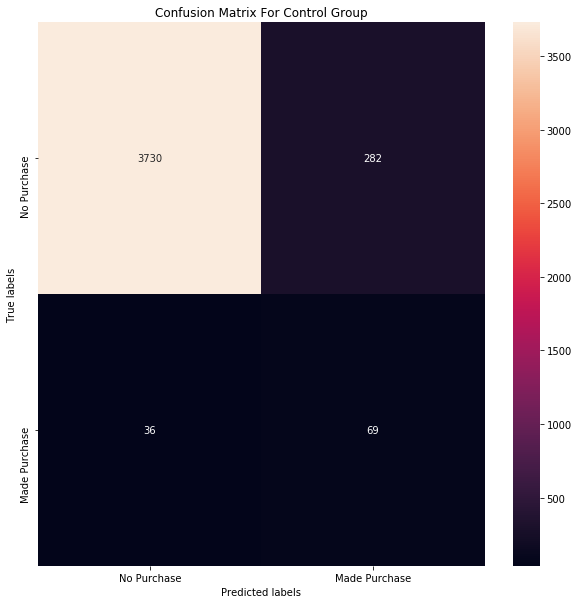

In [44]:
# confusion marix for thge validation set
valid_pred = model.predict(X_valid, ntree_limit=model.best_ntree_limit)
cm = sk.metrics.confusion_matrix(Y_valid_control, control_valid_pred)

fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For Control Group'); 
ax.xaxis.set_ticklabels(['No Purchase', 'Made Purchase']); 
ax.yaxis.set_ticklabels(['No Purchase', 'Made Purchase']);

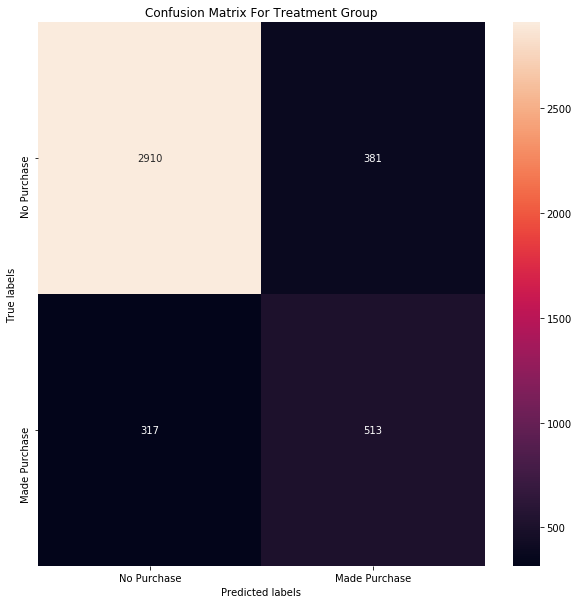

In [45]:

# confusion marix for thge validation set
valid_pred = model.predict(X_valid, ntree_limit=model.best_ntree_limit)
cm = sk.metrics.confusion_matrix(Y_valid_exper, exper_valid_pred)

fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For Treatment Group'); 
ax.xaxis.set_ticklabels(['No Purchase', 'Made Purchase']); 
ax.yaxis.set_ticklabels(['No Purchase', 'Made Purchase']);

In [46]:
def promotion_strategy(df):
    
    test = df
    
    pred_probs_contol = model_control.predict_proba(test, ntree_limit=model_control.best_ntree_limit)

    pred_probs_exper = model_exper.predict_proba(test, ntree_limit=model_exper.best_ntree_limit)
    
    # get difference in probabilities between experimental and control model for y = 1 label
    lift = pred_probs_exper[:,1] - pred_probs_contol[:,1]
    
    send = []
    
    # Only send promotions to top 3 percentile of probabilities >>>> Can change the cutoff if interested <<<<
    cutoff_lift = np.percentile(lift, 75) # the model showed a 0.75 uplift in the top 3 deciles (bins) out of 10
    
    for prob in lift:
        if prob > 0:
            if prob > cutoff_lift:
                send.append('yes')
        else:
            send.append('no')

    send = np.array(send)
    
    return send

In [47]:
# find out irr and nIr on our validation set
valid_results(promotion_strategy, valid)

(0.2588556581543425, 134811.22)

In [48]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

(0.29925777713367646, 144445.74)

Results:

- Using an XGBoost model, the performance of this approach on the test dataset is better that the Traditional One Model approach.
- If we were to send out promotions only to individuals with lift values in the top 3 deciles:
   - Test Set :
      - IRR = 0.2993 %
      - NIR = € 144445.74
   - Validation Set:
      - IRR = 0.2589 %
      - NIR = 134811.22
 

# Model 3: Four Quadrant Approach

- This approach utilizes a single model to predict the probability of an individual belonging to one of the 4 categories (quadrants), and hence its name. These categories are:
     - TR: the treatment and response group. Individuals in this group received a treatment (promotion) and responded (made a purchase)
     - CR: the control and response group. Individuals in this group received no treatment (no promotion) but still responded (made a purchase)
     - TN: the treatment and no response group. Individuals in this group received a treatment (promotion) but did not respond (made no purchase)
     - CN: the control and no response group. Individuals in this group received no treatment (no promotion) and did not respond (made no purchase)

- If an individual's TR probability is the highest among the four groups, it is likely that we will benefit by sending the individual a promotion to induce him or her to make a purchase.


        - max[P(TR),P(CR),P(TN),P(CN)] = P(TR)
     

In [49]:
# Load df_data
df_data = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\df_data.csv',delimiter =',')

# Load in test_data, check if everuthing checks out, compare with df_data
test_data = pd.read_csv(r'C:\Users\rol3x\MAIN_PATH\testwlabel.csv',delimiter =',')


In [50]:
# Drop Unnamed: 0 from bots sets, it tries to identify client number. The sets already have nr as enrty.
df_data = df_data.drop(['Unnamed: 0'],axis=1)
test_data = test_data.drop(['Unnamed: 0'],axis=1)

In [51]:
# Assign Group conditions
segment = []
for index, row in df_data.iterrows():
    if (row['Promotion'] == "Received") & (row['y'] == 1):
        # TR group
        segment.append(0)
    elif (row['Promotion'] == "Not Received") & (row['y'] == 1):
        # CR group
        segment.append(1)
    elif (row['Promotion'] == "Received") & (row['y'] == 0):
        # TN group
        segment.append(2)
    else: #CN group
        segment.append(3)

df_data['segment'] = segment
df_data.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,previous,poutcome,y,Promotion,segment
0,3,3,1,0,0,1,6,1,3,0,1,0,Received,2
1,3,7,1,3,0,1,6,1,2,0,1,0,Not Received,3
2,2,7,1,3,2,1,6,1,3,0,1,0,Received,2
3,2,0,1,1,0,1,6,1,2,0,1,0,Not Received,3
4,3,7,1,3,0,1,6,1,3,0,1,0,Received,2


In [52]:
train, valid = sk.model_selection.train_test_split(df_data, test_size=0.2,random_state=42)

features =['age','job','marital','education','housing','contact','month','day_of_week','duration','previous','poutcome']

Y_train = train['segment']
X_train = train[features]

Y_valid = valid['segment']
X_valid = valid[features]

In [53]:
# check set count
Y_train.value_counts()

3    16129
2    13116
0     3246
1      459
Name: segment, dtype: int64

In [54]:
# up sample with SMOTE
# normalize number by the largest y_train value count = 16129

#sm = SMOTE({0: 16129, 1: 16129, 2: 16129, 3: 16129},sampling_strategy = 'auto' ,random_state=42)

sm = SMOTE(sampling_strategy = 'all' ,random_state=42)
        
X_train_upsamp, Y_train_upsamp = sm.fit_sample(X_train, Y_train)
    
X_train_upsamp = pd.DataFrame(X_train_upsamp, columns=features)

Y_train_upsamp = pd.Series(Y_train_upsamp)
Y_train_upsamp.value_counts()

3    16129
2    16129
1    16129
0    16129
Name: segment, dtype: int64

In [55]:
X_train_upsamp.head()

,age,job,marital,education,housing,contact,month,day_of_week,duration,previous,poutcome
0,2,1,1,2,2,1,3,1,1,0,1
1,1,0,1,6,0,0,6,1,2,0,1
2,3,5,1,0,0,0,6,1,1,1,2
3,2,3,0,2,2,0,3,3,1,0,1
4,2,0,2,3,0,1,6,2,4,0,1


In [56]:
eval_set = [(X_train_upsamp, Y_train_upsamp), (X_valid, Y_valid)]
model = xgb.XGBClassifier(learning_rate = 0.1,\
                          num_class=4,\
                                  max_depth = 7,\
                                  min_child_weight = 5,\
                                  objective = 'multi:softmax',\
                                  seed = 42,\
                                  gamma = 0.1,\
                                  silent = True)
model.fit(X_train_upsamp, Y_train_upsamp, eval_set=eval_set,\
                    eval_metric="mlogloss", verbose=True, early_stopping_rounds=30)

[15:09:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mlogloss:1.26641	validation_1-mlogloss:1.26813
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 30 rounds.
[1]	validation_0-mlogloss:1.16764	validation_1-mlogloss:1.17116
[2]	validation_0-mlogloss:1.08159	validation_1-mlogloss:1.08641
[3]	validation_0-mlogloss:1.00695	validation_1-mlogloss:1.01378
[4]	validation_0-mlogloss:0.94313	validation_1-mlogloss:0.95151
[5]	validation_0-mlogloss:0.88868	validation_1-mlogloss:0.89845
[6]	validation_0-mlogloss:0.83875	validation_1-mlogloss:0.85074
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=42, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

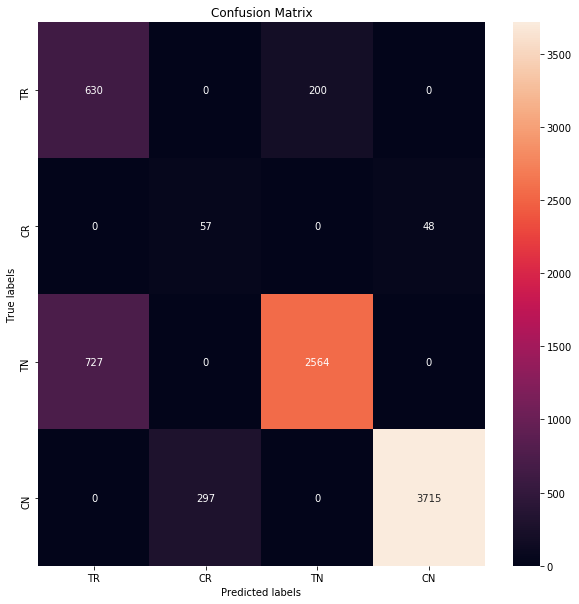

In [57]:
# confusion marix for the validation set
# Note:
# TR: treatment and respond group (received promotion and made purchase)
# CR: control and respond group (did not receive promotion but made purchase)
# TN: treatment and no respond group (received promotion but did not made purchase)
# CR: control and no respond group (did not receive promotion and made no purchase)
valid_pred = model.predict(X_valid, ntree_limit=model.best_ntree_limit)
cm = sk.metrics.confusion_matrix(Y_valid, valid_pred)

fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['TR', 'CR', 'TN', 'CN']); 
ax.yaxis.set_ticklabels(['TR', 'CR', 'TN', 'CN']);

In [64]:
# This model produced floats for 0 as 0.xxx  but 1 remained as int
# considered everything different from 1 as 0

def promotion_strategy(df):
    test = df
    
    pred = model.predict(test, ntree_limit=model.best_ntree_limit)
    
    send = []
    
    for pred in pred:
        if pred == 0 :
            send.append('yes')
        else:
            send.append('no')
    
    send = np.array(send)
    
    return send

In [65]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

C:\Users\rol3x\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  


(nan, 165999.32)

In [66]:
# find out irr and nlr on our validation set
valid_results(promotion_strategy, valid)

C:\Users\rol3x\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  


(nan, 152696.22)

Result:

- Test Set :
      - IRR = 0,198 %
      - NIR = € 165999.32
   - Validation Set:
      - IRR =0,188 %
      - NIR =  € 152696.22
 

> exercise source https://github.com/joshxinjie/Data_Scientist_Nanodegree/blob/master/starbucks_portfolio_exercise/Starbucks.ipynb